# Phase 2

## Sampling

In [118]:
#Imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
import graphviz
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
#for neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets

%matplotlib inline
sns.set(rc={'figure.figsize': [9, 9]}, font_scale=1.2)

In [3]:
#Open dataset
stars = pd.read_csv('star_final.csv')
stars

,temperature,luminosity,radius,abs_mag,color,spectral,type
0,-0.288666,-0.597375,-0.458557,0.915034,4,3,2
1,0.785407,0.517252,1.562087,-1.204119,1,2,5
2,0.235703,1.255803,-0.311623,-1.082590,1,2,4
3,0.050515,-0.597375,-0.458564,0.646342,2,1,2
4,-0.766032,-0.597375,-0.457904,0.700460,0,0,1
...,...,...,...,...,...,...,...
235,2.434203,0.628714,-0.408306,-0.995242,1,1,4
236,2.480264,0.507220,-0.446225,-0.849977,1,2,3
237,-0.706152,0.567410,1.388058,-1.483254,0,0,5
238,0.305947,-0.597375,-0.458562,0.881803,2,1,2


In [4]:
#Check the % of each type
stars['type'].value_counts()*100 / len(stars)

5    16.666667
4    16.666667
3    16.666667
2    16.666667
1    16.666667
0    16.666667
Name: type, dtype: float64

In [5]:
stars['type'].value_counts()

5    40
4    40
3    40
2    40
1    40
0    40
Name: type, dtype: int64

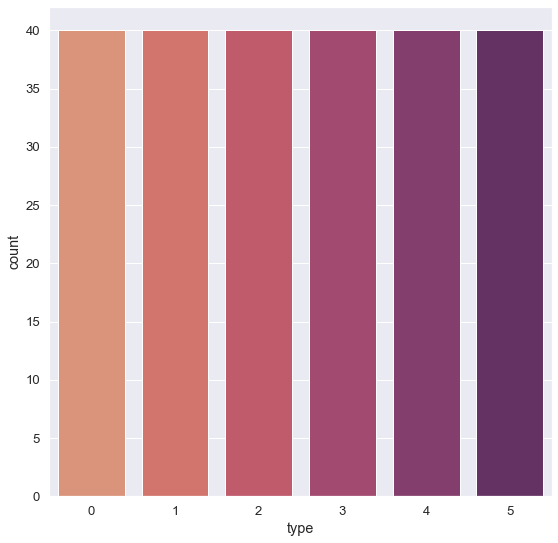

In [108]:
#Plot to check if balanced
sns.countplot(x='type', data=stars, palette='flare')
plt.savefig("balance.png")
plt.show()

In [7]:
#Splitting the data
x = stars.drop('type', axis=1)
y = stars['type']

# split train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [8]:
#check the dimensions
x_train

,temperature,luminosity,radius,abs_mag,color,spectral
0,-0.288666,-0.597375,-0.458557,0.915034,4,3
174,-0.741012,-0.597375,-0.458337,1.251136,0,0
73,-0.706466,2.467849,2.728080,-1.180383,5,0
183,-0.737767,0.372350,2.024230,-1.487052,0,0
148,-0.816281,-0.597375,-0.458330,1.107770,0,0
...,...,...,...,...,...,...
137,0.260304,-0.597375,-0.458562,0.650140,2,1
72,-0.761321,-0.597375,-0.458347,1.447670,0,0
140,-0.748759,-0.597375,-0.458053,0.751730,0,0
235,2.434203,0.628714,-0.408306,-0.995242,1,1


In [9]:
#combine the training part
train_data = pd.concat([x_train,y_train], axis=1)

In [10]:
train_data

,temperature,luminosity,radius,abs_mag,color,spectral,type
0,-0.288666,-0.597375,-0.458557,0.915034,4,3,2
174,-0.741012,-0.597375,-0.458337,1.251136,0,0,0
73,-0.706466,2.467849,2.728080,-1.180383,5,0,5
183,-0.737767,0.372350,2.024230,-1.487052,0,0,5
148,-0.816281,-0.597375,-0.458330,1.107770,0,0,0
...,...,...,...,...,...,...,...
137,0.260304,-0.597375,-0.458562,0.650140,2,1,2
72,-0.761321,-0.597375,-0.458347,1.447670,0,0,0
140,-0.748759,-0.597375,-0.458053,0.751730,0,0,1
235,2.434203,0.628714,-0.408306,-0.995242,1,1,4


In [11]:
#Target star types
star_0 = train_data[train_data['type'] == 0]
star_1 = train_data[train_data['type'] == 1]
star_2 = train_data[train_data['type'] == 2]
star_3 = train_data[train_data['type'] == 3]
star_4 = train_data[train_data['type'] == 4]
star_5 = train_data[train_data['type'] == 5]

In [12]:
#Print to know the largest after training split
print('length of star type 0: ' + str(len(star_0)))
print('length of star type 1: ' + str(len(star_1)))
print('length of star type 2: ' + str(len(star_2)))
print('length of star type 3: ' + str(len(star_3)))
print('length of star type 4: ' + str(len(star_4)))
print('length of star type 5: ' + str(len(star_5)))

numbers = [len(star_0),len(star_1),len(star_2),len(star_3),len(star_4),len(star_5)]
print(numbers)

length of star type 0: 37
length of star type 1: 33
length of star type 2: 31
length of star type 3: 25
length of star type 4: 35
length of star type 5: 31
[37, 33, 31, 25, 35, 31]


In [13]:
#Upsample
star0_up = resample(star_0, replace = True, n_samples = 37*4, random_state = 1)
star1_up = resample(star_1, replace = True, n_samples = 37*4, random_state = 1)
star2_up = resample(star_2, replace = True, n_samples = 37*4, random_state = 1)
star3_up = resample(star_3, replace = True, n_samples = 37*4, random_state = 1)
star4_up = resample(star_4, replace = True, n_samples = 37*4, random_state = 1)
star5_up = resample(star_5, replace = True, n_samples = 37*4, random_state = 1)

In [14]:
#combine into one dataframe
upsampled = pd.concat([star0_up, star1_up, star2_up, star3_up, star4_up, star5_up])

#check the new counts
upsampled['type'].value_counts()

5    148
4    148
3    148
2    148
1    148
0    148
Name: type, dtype: int64

In [15]:
#show the new upsampled dataframe
upsampled

,temperature,luminosity,radius,abs_mag,color,spectral,type
177,-0.895947,-0.597375,-0.458382,1.488496,0,0,0
55,-0.762054,-0.597375,-0.458390,1.230248,0,0,0
17,-0.801625,-0.597375,-0.458368,1.196068,0,0,0
220,-0.796495,-0.597375,-0.458393,1.191321,0,0,0
231,-0.791680,-0.597375,-0.458357,1.377412,0,0,0
...,...,...,...,...,...,...,...
152,2.977520,1.491603,2.163453,-1.358878,1,2,5
74,-0.726984,0.210729,2.101576,-1.463316,0,0,5
37,1.194099,3.574060,1.726447,-1.144304,2,1,5
217,2.903612,0.923143,2.163453,-1.298113,1,2,5


In [16]:
#Randomize the training set
up_train = upsampled.sample(frac=1)
up_train

,temperature,luminosity,radius,abs_mag,color,spectral,type
157,-0.712433,-0.597375,-0.457672,0.609314,0,0,1
70,-0.343103,-0.597375,-0.458560,0.934972,4,4,2
100,-0.209105,-0.597375,-0.458562,0.960607,4,3,2
150,-0.769172,-0.597375,-0.457904,0.717550,0,0,1
84,1.995570,0.450374,-0.446940,-0.796809,2,1,3
...,...,...,...,...,...,...,...
220,-0.796495,-0.597375,-0.458393,1.191321,0,0,0
132,0.815765,-0.597375,-0.458563,0.797303,1,1,2
177,-0.895947,-0.597375,-0.458382,1.488496,0,0,0
91,0.862246,0.655354,-0.369633,-1.123416,1,2,4


In [17]:
#split the upsampled again into x train and y train
train_x = up_train.drop('type', axis=1)
train_y = up_train['type']

In [18]:
train_x

,temperature,luminosity,radius,abs_mag,color,spectral
157,-0.712433,-0.597375,-0.457672,0.609314,0,0
70,-0.343103,-0.597375,-0.458560,0.934972,4,4
100,-0.209105,-0.597375,-0.458562,0.960607,4,3
150,-0.769172,-0.597375,-0.457904,0.717550,0,0
84,1.995570,0.450374,-0.446940,-0.796809,2,1
...,...,...,...,...,...,...
220,-0.796495,-0.597375,-0.458393,1.191321,0,0
132,0.815765,-0.597375,-0.458563,0.797303,1,1
177,-0.895947,-0.597375,-0.458382,1.488496,0,0
91,0.862246,0.655354,-0.369633,-1.123416,1,2


In [19]:
train_y

157    1
70     2
100    2
150    1
84     3
      ..
220    0
132    2
177    0
91     4
229    1
Name: type, Length: 888, dtype: int64

## Decision Tree

In [20]:
#Building the Decision tree
dt = DecisionTreeClassifier()

In [21]:
#fit the data with the decision tree
dt = dt.fit(train_x,train_y)

In [22]:
#Make a prediction with the X_text 
y_pred = dt.predict(x_test)
y_pred

array([2, 5, 3, 4, 5, 1, 4, 3, 5, 5, 5, 1, 0, 4, 3, 2, 1, 2, 3, 3, 3, 2,
       0, 5, 3, 4, 3, 2, 1, 1, 3, 0, 3, 1, 2, 3, 4, 2, 5, 2, 1, 4, 4, 5,
       2, 5, 3, 3], dtype=int64)

In [23]:
#check for accuracy
print("Accuracy of a decision tree:",metrics.accuracy_score(y_test,y_pred))

Accuracy of a decision tree: 0.9583333333333334


In [24]:
#names of the features
attr = stars.columns.to_list()[:-1]
attr

['temperature', 'luminosity', 'radius', 'abs_mag', 'color', 'spectral']

In [25]:
#class names
target_names = ['0','1','2','3','4','5']
target_names

['0', '1', '2', '3', '4', '5']

In [29]:
#Plot the tree
dot_data = tree.export_graphviz(dt, out_file=None, feature_names=attr, class_names = target_names, filled=True, rounded=True, special_characters=True)
tree_graph = graphviz.Source(dot_data)

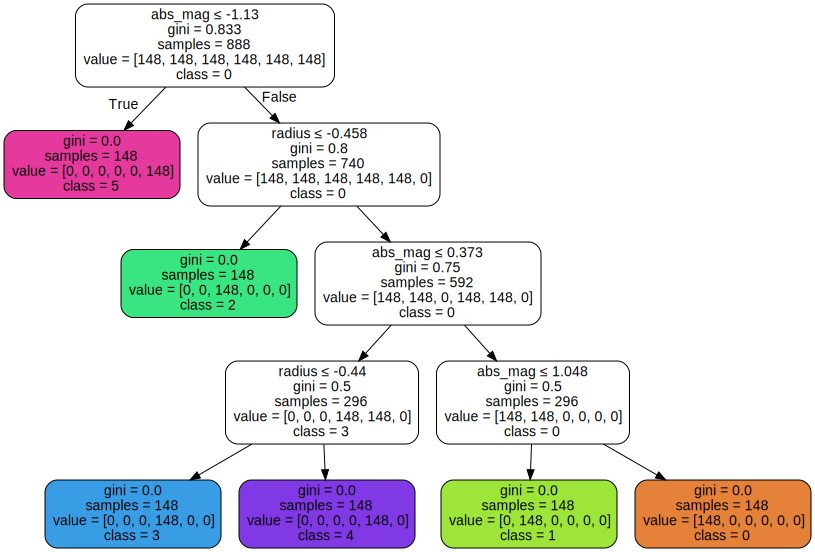

In [30]:
tree_graph

In [31]:
#Save the decision tree
tree_graph.render('DT')

'DT.pdf'

In [120]:
#Confusion matrix for decision tree
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[ 3,  0,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0,  0],
       [ 0,  0,  9,  0,  0,  0],
       [ 0,  0,  0, 13,  2,  0],
       [ 0,  0,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  0,  9]], dtype=int64)

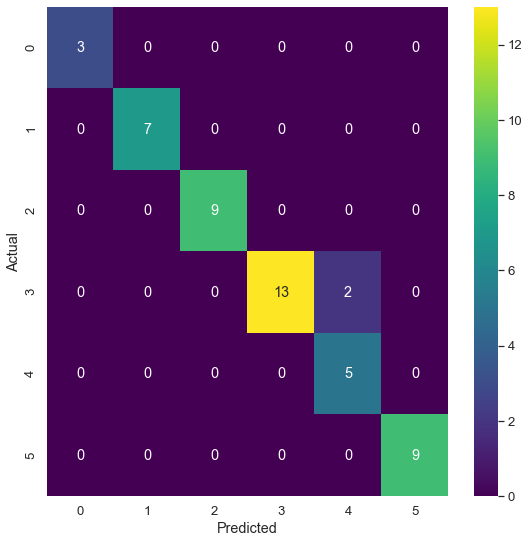

In [131]:
#plot confusion matrix
ax = sns.heatmap(conf_mat, annot=True, cmap='viridis')
ax.set(xlabel="Predicted", ylabel = "Actual")
plt.savefig("conf_mat_DT.png")
plt.show()

In [134]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         9
           3       1.00      0.87      0.93        15
           4       0.71      1.00      0.83         5
           5       1.00      1.00      1.00         9

    accuracy                           0.96        48
   macro avg       0.95      0.98      0.96        48
weighted avg       0.97      0.96      0.96        48



## Neural Network

In [36]:
#The input shape will be 6 for 6 features
train_x.shape[1]

6

In [51]:
#one hot encoding for class
y_train_net = to_categorical(train_y)

In [66]:
#one hot encoding for target
y_test_net = to_categorical(y_test)

In [68]:
#Try different models with different parameters
net_1 = Sequential([
    Dense(units = 50, activation='relu',input_shape=[train_x.shape[1]]),
    Dense(units = 100, activation='relu'),
    Dense(units = 50, activation='relu'),
    Dense(units=6, activation='softmax')
])

In [69]:
#View net_1 summary
net_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 50)                350       
_________________________________________________________________
dense_16 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_17 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_18 (Dense)             (None, 6)                 306       
Total params: 10,806
Trainable params: 10,806
Non-trainable params: 0
_________________________________________________________________


In [71]:
#Set up
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 5,
                         verbose = 1,
                         factor = 0.85,
                         min_lr = 1e-8)

mcp = ModelCheckpoint("./net_1", verbose=1, save_best_only=True)

es = EarlyStopping(verbose=1, patience=5)

net_1.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate = 0.0004),metrics=["acc"])

In [72]:
net_1_out = net_1.fit(train_x,train_y, validation_split=0.2, batch_size=8, epochs=10, callbacks=[lrd, mcp, es])

Train on 710 samples, validate on 178 samples
Epoch 1/10
664/710 [===========================>..] - ETA: 0s - loss: 1.4143 - acc: 0.6370
Epoch 00001: val_loss improved from inf to 0.97696, saving model to ./net_1
710/710 [==============================] - 1s 1ms/sample - loss: 1.3905 - acc: 0.6408 - val_loss: 0.9770 - val_acc: 0.6742
Epoch 2/10
392/710 [===============>..............] - ETA: 0s - loss: 0.7872 - acc: 0.8112
Epoch 00002: val_loss improved from 0.97696 to 0.47159, saving model to ./net_1
710/710 [==============================] - 0s 351us/sample - loss: 0.6698 - acc: 0.8282 - val_loss: 0.4716 - val_acc: 0.8202
Epoch 3/10
688/710 [============================>.] - ETA: 0s - loss: 0.3944 - acc: 0.8634
Epoch 00003: val_loss improved from 0.47159 to 0.33687, saving model to ./net_1
710/710 [==============================] - 0s 332us/sample - loss: 0.3921 - acc: 0.8676 - val_loss: 0.3369 - val_acc: 0.9607
Epoch 4/10
656/710 [==========================>...] - ETA: 0s - loss: 0.

In [73]:
net_1.evaluate(x_test, y_test)

48/48 [==============================] - 0s 83us/sample - loss: 0.1647 - acc: 0.9167


[0.1646814445654551, 0.9166667]

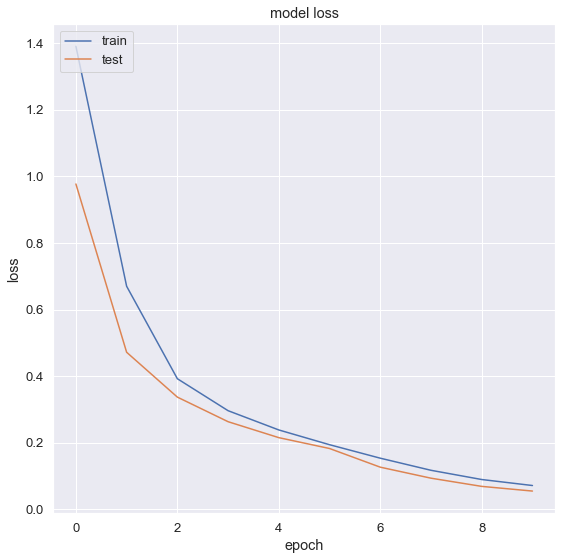

In [109]:
#Underfitting
plt.plot(net_1_out.history['loss'])
plt.plot(net_1_out.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("net_1_loss.png")
plt.show()

In [77]:
#Try different models with different parameters
net_2 = Sequential([
    Dense(units = 12, activation='elu',input_shape=[train_x.shape[1]]),
    Dense(units =24, activation='elu'),
    Dense(units = 12, activation='elu'),
    Dense(units=6, activation='softmax')
])

In [78]:
#Set up
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 5,
                         verbose = 1,
                         factor = 0.80,
                         min_lr = 1e-8)

mcp = ModelCheckpoint("./net_2", verbose=1, save_best_only=True)

es = EarlyStopping(verbose=1, patience=5)

net_2.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate = 0.0002),metrics=["acc"])

In [80]:
net_2_out = net_2.fit(train_x,train_y, validation_split=0.3, batch_size=8, epochs=20, callbacks=[lrd, mcp, es])

Train on 621 samples, validate on 267 samples
Epoch 1/20
360/621 [================>.............] - ETA: 0s - loss: 0.4042 - acc: 0.8806
Epoch 00001: val_loss improved from 0.43673 to 0.41334, saving model to ./net_1
621/621 [==============================] - 0s 232us/sample - loss: 0.4131 - acc: 0.8551 - val_loss: 0.4133 - val_acc: 0.9588
Epoch 2/20
432/621 [===================>..........] - ETA: 0s - loss: 0.3991 - acc: 0.9190
Epoch 00002: val_loss improved from 0.41334 to 0.39162, saving model to ./net_1
621/621 [==============================] - 0s 220us/sample - loss: 0.3902 - acc: 0.9291 - val_loss: 0.3916 - val_acc: 0.9588
Epoch 3/20
384/621 [=================>............] - ETA: 0s - loss: 0.3735 - acc: 0.8828
Epoch 00003: val_loss improved from 0.39162 to 0.37089, saving model to ./net_1
621/621 [==============================] - 0s 230us/sample - loss: 0.3708 - acc: 0.8663 - val_loss: 0.3709 - val_acc: 0.9026
Epoch 4/20
408/621 [==================>...........] - ETA: 0s - lo

In [81]:
net_2.evaluate(x_test, y_test)

48/48 [==============================] - 0s 42us/sample - loss: 0.1677 - acc: 0.9792


[0.16765400767326355, 0.9791667]

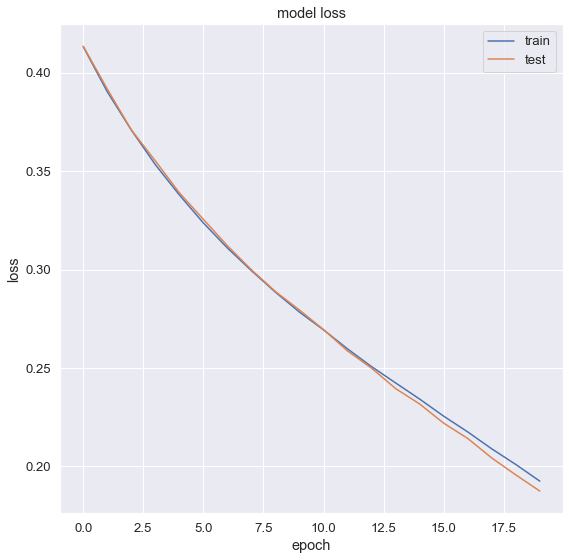

In [110]:
plt.plot(net_2_out.history['loss'])
plt.plot(net_2_out.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig("net_2_loss.png")
plt.show()

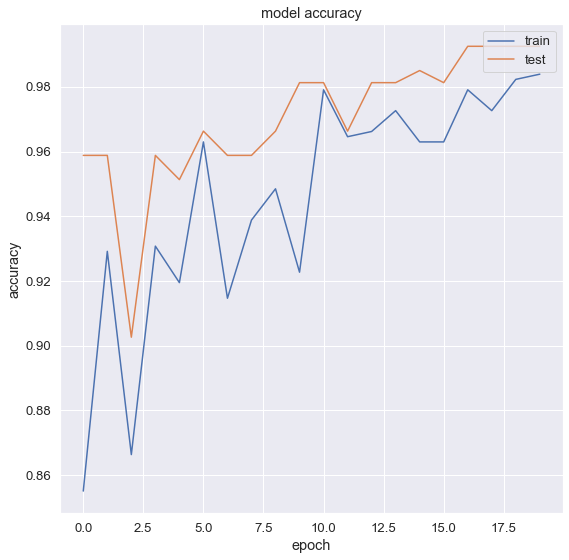

In [111]:
plt.plot(net_2_out.history['acc'])
plt.plot(net_2_out.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig("net_2_acc.png")
plt.show()

In [85]:
#Try different models with different parameters
net_3 = Sequential([
    Dense(units = 12, activation='elu',input_shape=[train_x.shape[1]]),
    Dense(units =24, activation='elu'),
    Dense(units = 12, activation='elu'),
    Dense(units=6, activation='softmax')
])

In [88]:
#Set up
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 10,
                         verbose = 1,
                         factor = 0.80,
                         min_lr = 1e-8)

mcp = ModelCheckpoint("./net_3", verbose=1, save_best_only=True)

es = EarlyStopping(verbose=1, patience=10)

net_3.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate = 0.0001),metrics=["acc"])

In [89]:
net_3_out = net_3.fit(train_x,train_y, validation_split=0.3, batch_size=8, epochs=50, callbacks=[lrd, mcp, es])

Train on 621 samples, validate on 267 samples
Epoch 1/50
400/621 [==================>...........] - ETA: 0s - loss: 2.1274 - acc: 0.1225    
Epoch 00001: val_loss improved from inf to 2.04255, saving model to ./net_2
621/621 [==============================] - 1s 1ms/sample - loss: 2.1140 - acc: 0.1256 - val_loss: 2.0425 - val_acc: 0.1386
Epoch 2/50
344/621 [===============>..............] - ETA: 0s - loss: 1.9540 - acc: 0.1512
Epoch 00002: val_loss improved from 2.04255 to 1.86996, saving model to ./net_2
621/621 [==============================] - 0s 225us/sample - loss: 1.9290 - acc: 0.1385 - val_loss: 1.8700 - val_acc: 0.1386
Epoch 3/50
440/621 [====================>.........] - ETA: 0s - loss: 1.7850 - acc: 0.1568
Epoch 00003: val_loss improved from 1.86996 to 1.72752, saving model to ./net_2
621/621 [==============================] - 0s 270us/sample - loss: 1.7733 - acc: 0.1530 - val_loss: 1.7275 - val_acc: 0.1461
Epoch 4/50
360/621 [================>.............] - ETA: 0s - loss

621/621 [==============================] - 0s 315us/sample - loss: 0.5779 - acc: 0.9356 - val_loss: 0.5965 - val_acc: 0.9401
Epoch 29/50
416/621 [===================>..........] - ETA: 0s - loss: 0.5630 - acc: 0.9495
Epoch 00029: val_loss improved from 0.59652 to 0.57911, saving model to ./net_2
621/621 [==============================] - 0s 221us/sample - loss: 0.5598 - acc: 0.9597 - val_loss: 0.5791 - val_acc: 0.9513
Epoch 30/50
392/621 [=================>............] - ETA: 0s - loss: 0.5445 - acc: 0.9413
Epoch 00030: val_loss improved from 0.57911 to 0.56217, saving model to ./net_2
621/621 [==============================] - 0s 225us/sample - loss: 0.5419 - acc: 0.9469 - val_loss: 0.5622 - val_acc: 0.9476
Epoch 31/50
400/621 [==================>...........] - ETA: 0s - loss: 0.5328 - acc: 0.9200
Epoch 00031: val_loss improved from 0.56217 to 0.54443, saving model to ./net_2
621/621 [==============================] - 0s 214us/sample - loss: 0.5256 - acc: 0.9098 - val_loss: 0.5444 - 

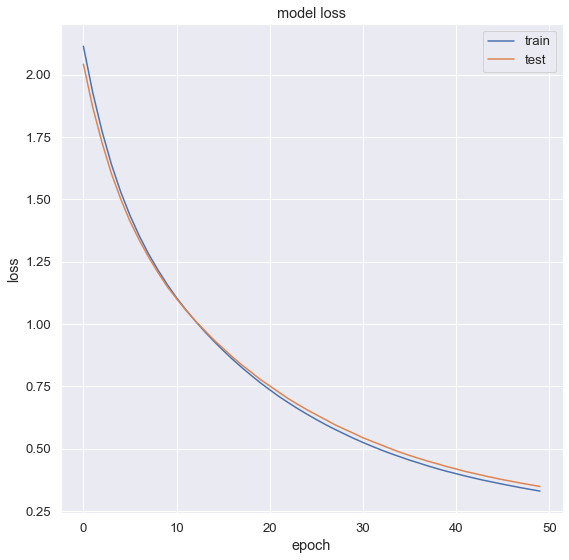

In [112]:
plt.plot(net_3_out.history['loss'])
plt.plot(net_3_out.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig("net_3_loss.png")
plt.show()

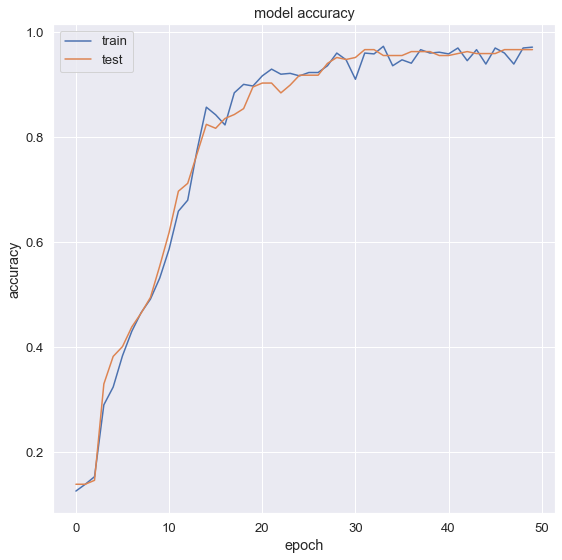

In [113]:
plt.plot(net_3_out.history['acc'])
plt.plot(net_3_out.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("net_3_acc.png")
plt.show()

In [92]:
net_3.evaluate(x_test, y_test)

48/48 [==============================] - 0s 43us/sample - loss: 0.3219 - acc: 0.8958


[0.32194529970486957, 0.8958333]

In [93]:
#Try different models with different parameters
net_4 = Sequential([
    Dense(units = 12, activation='elu',input_shape=[train_x.shape[1]]),
    Dense(units =24, activation='elu'),
    Dense(units = 12, activation='elu'),
    Dense(units=6, activation='softmax')
])

In [94]:
#Set up
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 10,
                         verbose = 1,
                         factor = 0.80,
                         min_lr = 1e-8)

mcp = ModelCheckpoint("./net_4", verbose=1, save_best_only=True)

es = EarlyStopping(verbose=1, patience=10)

net_4.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate = 0.0001),metrics=["acc"])

In [95]:
net_4_out = net_4.fit(train_x,train_y, validation_split=0.3, batch_size=8, epochs=200, callbacks=[lrd, mcp, es])

Train on 621 samples, validate on 267 samples
Epoch 1/200
376/621 [=================>............] - ETA: 0s - loss: 1.7435 - acc: 0.2872
Epoch 00001: val_loss improved from inf to 1.61776, saving model to ./net_2
621/621 [==============================] - 1s 2ms/sample - loss: 1.7017 - acc: 0.2915 - val_loss: 1.6178 - val_acc: 0.3071
Epoch 2/200
368/621 [================>.............] - ETA: 0s - loss: 1.6215 - acc: 0.3125
Epoch 00002: val_loss improved from 1.61776 to 1.53200, saving model to ./net_2
621/621 [==============================] - 0s 355us/sample - loss: 1.6026 - acc: 0.3382 - val_loss: 1.5320 - val_acc: 0.3745
Epoch 3/200
392/621 [=================>............] - ETA: 0s - loss: 1.5368 - acc: 0.3903
Epoch 00003: val_loss improved from 1.53200 to 1.45351, saving model to ./net_2
621/621 [==============================] - 0s 383us/sample - loss: 1.5151 - acc: 0.4106 - val_loss: 1.4535 - val_acc: 0.4457
Epoch 4/200
408/621 [==================>...........] - ETA: 0s - loss

621/621 [==============================] - 0s 552us/sample - loss: 0.5418 - acc: 0.9050 - val_loss: 0.5529 - val_acc: 0.9139
Epoch 29/200
560/621 [==========================>...] - ETA: 0s - loss: 0.5259 - acc: 0.8946
Epoch 00029: val_loss improved from 0.55288 to 0.53345, saving model to ./net_2
621/621 [==============================] - 0s 345us/sample - loss: 0.5225 - acc: 0.8905 - val_loss: 0.5335 - val_acc: 0.9213
Epoch 30/200
568/621 [==========================>...] - ETA: 0s - loss: 0.4972 - acc: 0.9190
Epoch 00030: val_loss improved from 0.53345 to 0.51438, saving model to ./net_2
621/621 [==============================] - 0s 304us/sample - loss: 0.5037 - acc: 0.9066 - val_loss: 0.5144 - val_acc: 0.9251
Epoch 31/200
544/621 [=========================>....] - ETA: 0s - loss: 0.4971 - acc: 0.9357
Epoch 00031: val_loss improved from 0.51438 to 0.49764, saving model to ./net_2
621/621 [==============================] - 0s 331us/sample - loss: 0.4864 - acc: 0.9372 - val_loss: 0.4976

Epoch 56/200
496/621 [======================>.......] - ETA: 0s - loss: 0.2222 - acc: 0.9960
Epoch 00056: val_loss improved from 0.22667 to 0.21775, saving model to ./net_2
621/621 [==============================] - 0s 307us/sample - loss: 0.2226 - acc: 0.9903 - val_loss: 0.2178 - val_acc: 0.9813
Epoch 57/200
464/621 [=====================>........] - ETA: 0s - loss: 0.2140 - acc: 0.9828
Epoch 00057: val_loss improved from 0.21775 to 0.21108, saving model to ./net_2
621/621 [==============================] - 0s 353us/sample - loss: 0.2160 - acc: 0.9807 - val_loss: 0.2111 - val_acc: 0.9850
Epoch 58/200
272/621 [============>.................] - ETA: 0s - loss: 0.1942 - acc: 0.9853
Epoch 00058: val_loss improved from 0.21108 to 0.20462, saving model to ./net_2
621/621 [==============================] - 0s 234us/sample - loss: 0.2099 - acc: 0.9742 - val_loss: 0.2046 - val_acc: 0.9925
Epoch 59/200
608/621 [============================>.] - ETA: 0s - loss: 0.2013 - acc: 0.9951
Epoch 00059: 

Epoch 84/200
496/621 [======================>.......] - ETA: 0s - loss: 0.0899 - acc: 0.9960
Epoch 00084: val_loss improved from 0.08248 to 0.07979, saving model to ./net_2
621/621 [==============================] - 0s 392us/sample - loss: 0.0892 - acc: 0.9952 - val_loss: 0.0798 - val_acc: 1.0000
Epoch 85/200
424/621 [===================>..........] - ETA: 0s - loss: 0.0873 - acc: 1.0000
Epoch 00085: val_loss improved from 0.07979 to 0.07638, saving model to ./net_2
621/621 [==============================] - 1s 973us/sample - loss: 0.0862 - acc: 1.0000 - val_loss: 0.0764 - val_acc: 1.0000
Epoch 86/200
512/621 [=======================>......] - ETA: 0s - loss: 0.0857 - acc: 1.0000
Epoch 00086: val_loss improved from 0.07638 to 0.07433, saving model to ./net_2
621/621 [==============================] - 0s 390us/sample - loss: 0.0828 - acc: 1.0000 - val_loss: 0.0743 - val_acc: 1.0000
Epoch 87/200
560/621 [==========================>...] - ETA: 0s - loss: 0.0824 - acc: 1.0000
Epoch 00087: 

621/621 [==============================] - 0s 355us/sample - loss: 0.0366 - acc: 1.0000 - val_loss: 0.0310 - val_acc: 1.0000
Epoch 112/200
536/621 [========================>.....] - ETA: 0s - loss: 0.0355 - acc: 1.0000
Epoch 00112: val_loss improved from 0.03098 to 0.02996, saving model to ./net_2
621/621 [==============================] - 0s 337us/sample - loss: 0.0360 - acc: 1.0000 - val_loss: 0.0300 - val_acc: 1.0000
Epoch 113/200
496/621 [======================>.......] - ETA: 0s - loss: 0.0352 - acc: 1.0000
Epoch 00113: val_loss improved from 0.02996 to 0.02926, saving model to ./net_2
621/621 [==============================] - 0s 366us/sample - loss: 0.0346 - acc: 1.0000 - val_loss: 0.0293 - val_acc: 1.0000
Epoch 114/200
536/621 [========================>.....] - ETA: 0s - loss: 0.0331 - acc: 1.0000
Epoch 00114: val_loss improved from 0.02926 to 0.02816, saving model to ./net_2
621/621 [==============================] - 0s 385us/sample - loss: 0.0337 - acc: 1.0000 - val_loss: 0.0

Epoch 139/200
464/621 [=====================>........] - ETA: 0s - loss: 0.0147 - acc: 1.0000
Epoch 00139: val_loss improved from 0.01314 to 0.01276, saving model to ./net_2
621/621 [==============================] - 0s 580us/sample - loss: 0.0157 - acc: 1.0000 - val_loss: 0.0128 - val_acc: 1.0000
Epoch 140/200
552/621 [=========================>....] - ETA: 0s - loss: 0.0153 - acc: 1.0000
Epoch 00140: val_loss improved from 0.01276 to 0.01238, saving model to ./net_2
621/621 [==============================] - 0s 565us/sample - loss: 0.0154 - acc: 1.0000 - val_loss: 0.0124 - val_acc: 1.0000
Epoch 141/200
376/621 [=================>............] - ETA: 0s - loss: 0.0157 - acc: 1.0000
Epoch 00141: val_loss improved from 0.01238 to 0.01196, saving model to ./net_2
621/621 [==============================] - 0s 373us/sample - loss: 0.0148 - acc: 1.0000 - val_loss: 0.0120 - val_acc: 1.0000
Epoch 142/200
408/621 [==================>...........] - ETA: 0s - loss: 0.0149 - acc: 1.0000
Epoch 001

Epoch 00166: val_loss improved from 0.00595 to 0.00576, saving model to ./net_2
621/621 [==============================] - 0s 344us/sample - loss: 0.0073 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 1.0000
Epoch 167/200
512/621 [=======================>......] - ETA: 0s - loss: 0.0069 - acc: 1.0000
Epoch 00167: val_loss improved from 0.00576 to 0.00559, saving model to ./net_2
621/621 [==============================] - 0s 281us/sample - loss: 0.0072 - acc: 1.0000 - val_loss: 0.0056 - val_acc: 1.0000
Epoch 168/200
384/621 [=================>............] - ETA: 0s - loss: 0.0061 - acc: 1.0000
Epoch 00168: val_loss improved from 0.00559 to 0.00547, saving model to ./net_2
621/621 [==============================] - 0s 265us/sample - loss: 0.0071 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 1.0000
Epoch 169/200
480/621 [======================>.......] - ETA: 0s - loss: 0.0066 - acc: 1.0000
Epoch 00169: val_loss improved from 0.00547 to 0.00530, saving model to ./net_2
621/621 [==============

Epoch 194/200
464/621 [=====================>........] - ETA: 0s - loss: 0.0033 - acc: 1.0000
Epoch 00194: val_loss improved from 0.00283 to 0.00268, saving model to ./net_2
621/621 [==============================] - 0s 191us/sample - loss: 0.0035 - acc: 1.0000 - val_loss: 0.0027 - val_acc: 1.0000
Epoch 195/200
448/621 [====================>.........] - ETA: 0s - loss: 0.0037 - acc: 1.0000    
Epoch 00195: val_loss improved from 0.00268 to 0.00267, saving model to ./net_2
621/621 [==============================] - 0s 204us/sample - loss: 0.0033 - acc: 1.0000 - val_loss: 0.0027 - val_acc: 1.0000
Epoch 196/200
464/621 [=====================>........] - ETA: 0s - loss: 0.0035 - acc: 1.0000    
Epoch 00196: val_loss improved from 0.00267 to 0.00255, saving model to ./net_2
621/621 [==============================] - 0s 191us/sample - loss: 0.0033 - acc: 1.0000 - val_loss: 0.0026 - val_acc: 1.0000
Epoch 197/200
440/621 [====================>.........] - ETA: 0s - loss: 0.0030 - acc: 1.0000  

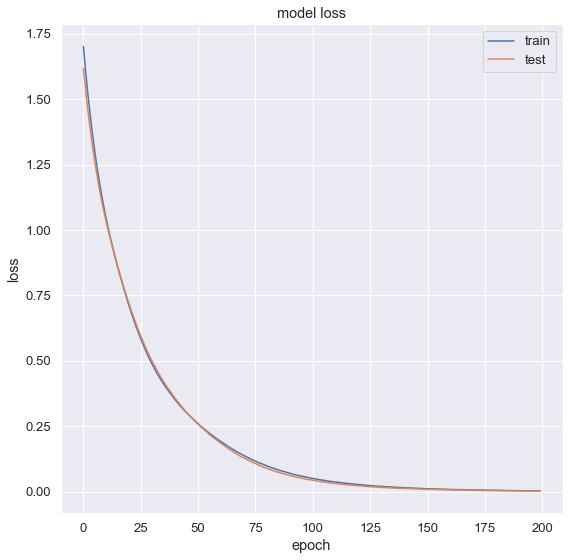

In [114]:
plt.plot(net_4_out.history['loss'])
plt.plot(net_4_out.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig("net_4_loss.png")
plt.show()

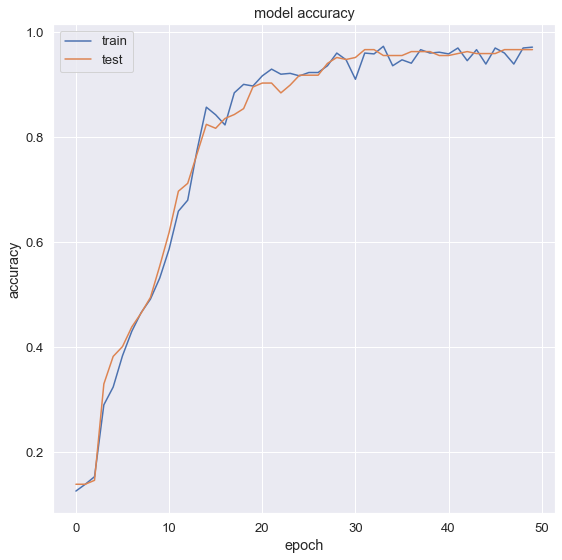

In [115]:
plt.plot(net_3_out.history['acc'])
plt.plot(net_3_out.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("net_4_acc.png")
plt.show()

In [125]:
net_4.evaluate(x_test, y_test)

48/48 [==============================] - 0s 374us/sample - loss: 0.1072 - acc: 0.9583


[0.10722058763106664, 0.9583333]

In [127]:
net_3_pred = net_3.predict_classes(x_test)
net_3_pred

array([2, 5, 3, 4, 5, 1, 4, 3, 5, 5, 5, 0, 0, 4, 3, 2, 1, 2, 3, 4, 3, 2,
       0, 5, 4, 4, 3, 2, 1, 1, 3, 0, 3, 1, 2, 3, 4, 2, 5, 2, 1, 4, 4, 5,
       2, 5, 3, 3], dtype=int64)

In [128]:
conf_mat_net = confusion_matrix(y_test, net_3_pred)
conf_mat_net

array([[ 3,  0,  0,  0,  0,  0],
       [ 1,  6,  0,  0,  0,  0],
       [ 0,  0,  9,  0,  0,  0],
       [ 0,  0,  0, 11,  4,  0],
       [ 0,  0,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  0,  9]], dtype=int64)

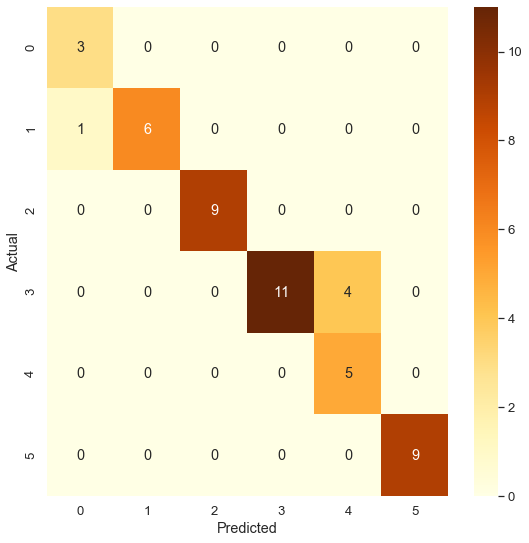

In [132]:
#plot confusion matrix
ax = sns.heatmap(conf_mat_net, annot=True, cmap='YlOrBr')
ax.set(xlabel="Predicted", ylabel = "Actual")
plt.savefig("conf_mat_NN.png")
plt.show()

In [133]:
print(classification_report(y_test, net_3_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.86      0.92         7
           2       1.00      1.00      1.00         9
           3       1.00      0.73      0.85        15
           4       0.56      1.00      0.71         5
           5       1.00      1.00      1.00         9

    accuracy                           0.90        48
   macro avg       0.88      0.93      0.89        48
weighted avg       0.94      0.90      0.90        48

